In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

First we'll open the various docs and see how big they are.

In [2]:
df = pd.read_csv('../data/training_set_values.csv')

In [3]:
df.shape

(59400, 40)

In [4]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


"training_set_values" has 59,400 records.

In [5]:
df = pd.read_csv('../data/training_set_labels.csv')

In [6]:
df.shape

(59400, 2)

In [7]:
df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

"training_set_labels" just tells you what the status of those 59,400 records is.

In [9]:
df = pd.read_csv('../data/test_set_values.csv')

In [10]:
df.shape

(14850, 40)

In [11]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


"test_set_values" is just like training_set_values, with fewer records (14,850).

In [12]:
df = pd.read_csv('../data/SubmissionFormat.csv')

In [13]:
df.shape

(14850, 2)

In [14]:
df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


"SubmissionFormat" is like training_set_labels except the contestant/data scientist has to provide the labels.

# Summary of available files
There is a training set consisting of 59,400 records, a set of labels for those 59,400 records,  a test set consisting of 14,850 records, and a template for submitting labels for those 14,850 test records to an online contest.

Because we do not have labels for the 14,850 records in the test set, those are useless to us. We will have to carve out training and test sets from the 59,400 records with known labels.

# Examining the training set

Let's look closer at the training set. First we'll drop duplicates.

In [15]:
# reload the training set
df = pd.read_csv('../data/training_set_values.csv')
# check for duplicates, excluding the ids
df[df.duplicated(subset=df.columns.difference(['id']))].shape

(37, 40)

In [16]:
# drop the duplicate records
df.drop(df[df.duplicated(subset=df.columns.difference(['id']))].index, inplace=True)

Now we'll look at missing values.

In [17]:
# show columns with missing values and the number of values missing
df[df.columns[df.isna().any()]].isna().sum()

funder                3635
installer             3655
subvillage             371
public_meeting        3314
scheme_management     3877
scheme_name          28138
permit                3056
dtype: int64

Let's look at how many unique values each of these columns has.

In [18]:
df[df.columns[df.isna().any()]].nunique()

funder                1897
installer             2145
subvillage           19287
public_meeting           2
scheme_management       12
scheme_name           2696
permit                   2
dtype: int64

# *****For now
We will drop these columns and move forward with the ones that are intact.

In [19]:
df.dropna(axis='columns', inplace=True)

Let's look at just numerical features.

In [20]:
df.select_dtypes(include=['number']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59363 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59363 non-null  int64  
 1   amount_tsh         59363 non-null  float64
 2   gps_height         59363 non-null  int64  
 3   longitude          59363 non-null  float64
 4   latitude           59363 non-null  float64
 5   num_private        59363 non-null  int64  
 6   region_code        59363 non-null  int64  
 7   district_code      59363 non-null  int64  
 8   population         59363 non-null  int64  
 9   construction_year  59363 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 5.0 MB


None appear to be missing values, but this can be deceiving. Let's look closer for zeros.

In [21]:
df.select_dtypes(include=['int','float']).describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59363.00000,59363.000000,59363.000000,59363.000000,5.936300e+04,59363.000000,59363.000000,59363.000000,59363.000000,59363.000000
mean,37118.57487,317.848371,668.713778,34.098134,-5.709559e+00,0.474437,15.295487,5.631572,180.022118,1301.463150
std,21451.49735,2998.498105,693.131418,6.515617,2.943539e+00,12.240037,17.592766,9.636200,471.607687,951.362721
min,0.00000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18528.50000,0.000000,0.000000,33.095232,-8.541951e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37064.00000,0.000000,370.000000,34.910385,-5.023920e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55657.00000,20.000000,1320.000000,37.179574,-3.326925e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [22]:
# show value counts for amount_tsh feature
df.amount_tsh.value_counts()

0.0         41602
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

This is the "amount of water available to a water point". *Most* of these values are zero. This seems like a very relevant feature, and it would be a shame if the zeros were some kind of error. Let's optimistically assume the zeros are meaningful.

In [23]:
df.gps_height.value_counts()

 0       20401
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

This is altitude (or elevation), in meters. There are probably too many zeros here for altitude to be real. We'll investigate this further after we look at longitude and latitude.

In [24]:
# show value counts for longitude feature
df.longitude.value_counts()

0.000000     1776
38.340501       2
37.297680       2
33.010510       2
32.972719       2
             ... 
36.871976       1
37.579803       1
33.196490       1
34.017119       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [25]:
# show value counts for latitude feature
df.latitude.value_counts()

-2.000000e-08    1776
-6.965834e+00       2
-6.985842e+00       2
-7.056923e+00       2
-6.963557e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

There are quite a few zeros or near-zeros for longitude and latitude. Let's first look at the 1,776 records that lack positional coordinates and see whether they're worth repairing.

In [26]:
# describe the numerical features of records with zero longitude
df.select_dtypes(include=['number'])[df['longitude'] == 0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,1776.000000,1776.0,1776.0,1776.0,1.776000e+03,1776.0,1776.000000,1776.000000,1776.0,1776.0
mean,37500.134009,0.0,0.0,0.0,-2.000000e-08,0.0,17.822072,2.493243,0.0,0.0
std,21354.335993,0.0,0.0,0.0,0.000000e+00,0.0,1.024702,2.153271,0.0,0.0
min,15.000000,0.0,0.0,0.0,-2.000000e-08,0.0,11.000000,1.000000,0.0,0.0
25%,18713.750000,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0
50%,37514.000000,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0
75%,55509.750000,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0
max,74193.000000,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0


These records (now 1,776 of them after dropping duplicates) seem worthless, as they all have probably-erroneous zero values for most of the other numerical features. The only numerical data they offer are their region and district codes. Let's find out where those regions and districts are before we drop the records.

In [27]:
# show value counts for the region_code of the zero-longitude records
df[df['longitude'] == 0]['region_code'].value_counts()

17    1034
19     739
11       3
Name: region_code, dtype: int64

In [28]:
# show value counts for the district_code of the zero-longitude records
df[df['longitude'] == 0]['district_code'].value_counts()

1    1034
6     476
2     263
4       3
Name: district_code, dtype: int64

Maybe if we plot the positions of records *with* GPS coordinates from these districts, we'll get some idea of where these problematic records are coming from.

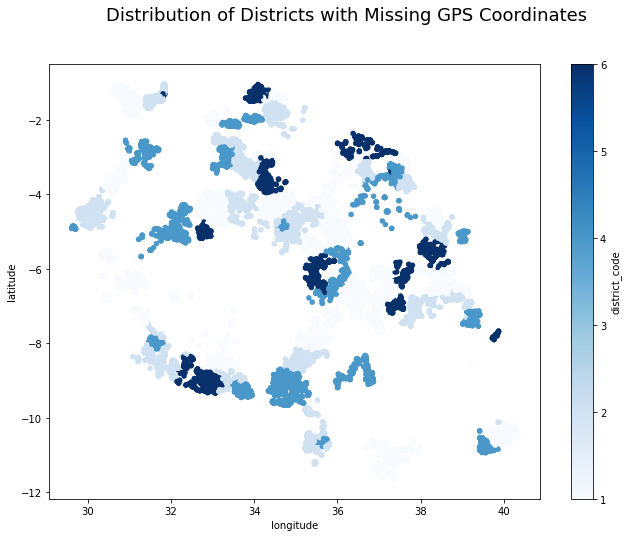

In [29]:
# generate a geographical map of all listings in the districts where the 1,776 records lacking long/lat are
fig, ax = plt.subplots(figsize=(11,8))
df[(df['longitude'] != 0) & (df['district_code'].isin([1,2,4,6]))].plot.scatter(
    x='longitude', y='latitude', c='district_code', cmap='Blues', ax=ax)
fig.suptitle('Distribution of Districts with Missing GPS Coordinates', size=18);

While the 1,776 problematic records all come from the same handful of districts, the map offers no other clues about what they may have in common, because it appears that "districts" and "regions" are not essentially contiguous but rather each consist of several discrete clusters. In any case, it looks like it won't be possible to recover or even approximate the GPS data for these records, so we might as well drop them.

In [30]:
# drop all zero-longitude records
df.drop(df[df['longitude'] == 0].index, inplace=True)

Next, let's make a color-coded plot to see whether the gps height data makes sense by comparing it to an available topographical map.

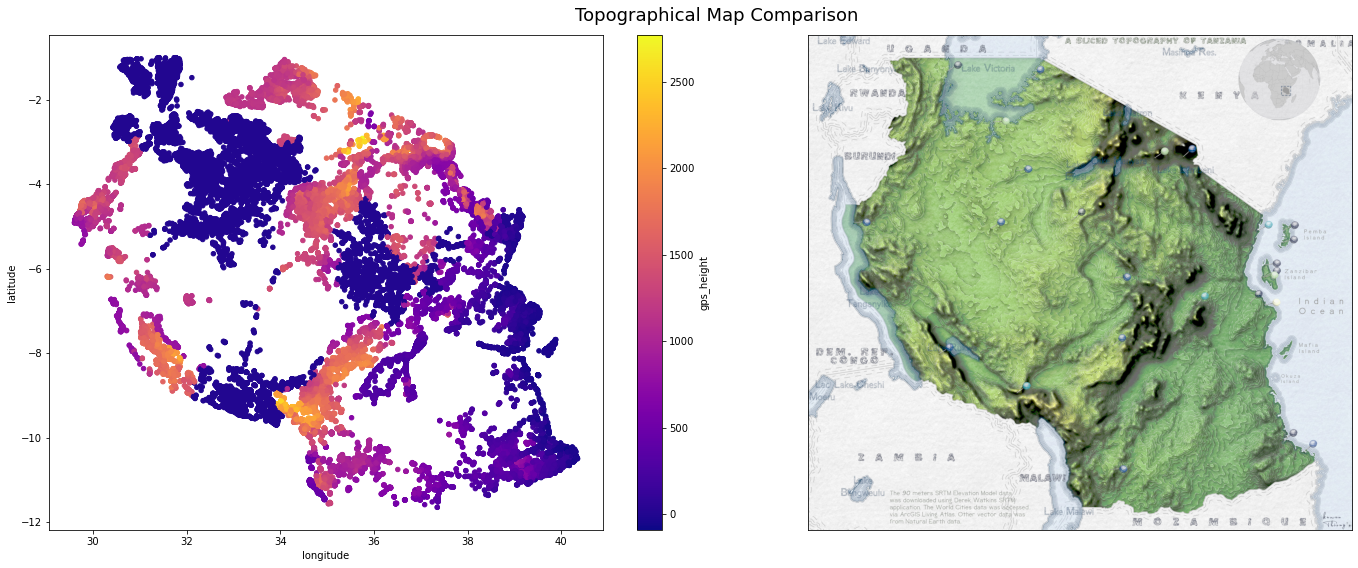

In [31]:
# set figure with two axes over two columns
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,8))
# plot long/lat for nonzero longs with color gradient for elevation
df.plot.scatter(x='longitude', y='latitude', c='gps_height', cmap='plasma', ax=ax1)
# upload an image
im = plt.imread("../images/topo_map.jpeg")
# display the image
im = ax2.imshow(im)
# hide X and Y axes label marks
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)
# hide X and Y axes tick marks
ax2.set_xticks([])
ax2.set_yticks([])
# title
fig.suptitle('Topographical Map Comparison', size=18)
fig.tight_layout();

It makes sense for the locations along the ocean to have zero elevation, but there are at least three inland clusters that seem more like they are just lacking elevation data. One solution would be to set elevation values equal to the median for all records that have matching geographical location features such as "subvillage", but it appears that this wouldn't help because the missing values are geographically set apart from non-missing values.

# *what to do about this?*

In [32]:
# show value counts for num_private feature
df.num_private.value_counts()

0      56830
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [33]:
df[df.num_private > 0].num_private.describe()

count     757.000000
mean       37.204756
std       101.958683
min         1.000000
25%         6.000000
50%        15.000000
75%        42.000000
max      1776.000000
Name: num_private, dtype: float64

In [34]:
df.region_code.value_counts()

11    5297
12    4639
3     4379
5     4040
17    3954
18    3323
2     3024
16    2816
10    2640
4     2513
19    2295
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [35]:
df.district_code.value_counts()

1     11146
2     10909
3      9997
4      8996
5      4356
6      3586
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [36]:
df.population.value_counts()

0       19568
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [37]:
df[df.population < 10].population.value_counts()

0    19568
1     7025
5       44
8       23
6       19
4       13
9       11
3        4
2        4
7        3
Name: population, dtype: int64

In [38]:
df.construction_year.value_counts()

0       18896
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

# A first-glance summary of the numerical features

None of the numerical features are missing any values, but some have a suspicious amount of zeros.

* amount_tsh: "Total Static Head". Some kind of measure of available water. This is mostly zeroes.
* gps_height: From a spot check, this appears to be given in meters. It has a lot of zeros.
* longitude, latitude: 1,812 records are essentially (0,0).
* num_private: It is not at all clear what this means.
* region_code, district_code: There are fewer unique district codes, suggesting they are possibly broader? There are some district codes equal to zero, which may or may not be an error.
* population: There are many zeroes, but perhaps this means they're just rural?
* construction_year: There are many zeroes, which will need to be dealt with.

First we'll check for duplicate records, excluding the ids, and drop any duplicates we find.

In [39]:
df.select_dtypes(include=['object']).nunique()

date_recorded              353
wpt_name                 36720
basin                        9
region                      21
lga                        124
ward                      2033
recorded_by                  1
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

In [40]:
df[df.columns[df.isna().any()]].isna().sum()

Series([], dtype: float64)

The upshot of this initial exploration is that we should drop the zero-longitude records and at least the scheme_name column and possibly the other columns with missing values. Then we still have to deal with the erroneous zero values for at least elevation, population, and construction year.

Then we may need to detect other problem values in the data in other ways that we can't see yet.